In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(df["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


Random Forest Application


In [6]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [7]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


Now we see number of frauds in train and test dataset.


In [8]:
print(y_train.sum())
print(y_test.sum())

344
148


In [11]:
import sklearn
print(sklearn.__version__)

1.6.1


In [12]:
# Install imbalanced-learn if needed: pip install imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize model with balanced sampling
model = BalancedRandomForestClassifier(
    n_estimators=100,
    sampling_strategy='auto',  # balances majority/minority classes
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42, sampling_strategy='auto')

In [13]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probabilities for fraud

# Generate metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.87      0.13       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

ROC-AUC: 0.9720014243095901


As precision for fraud cases is only 0.07 which reflects that only 7% of predicted frauds are real frauds and these metrics clearly showing high class imbalance as number of non fraud cases clearly outweighs number of fraud cases.

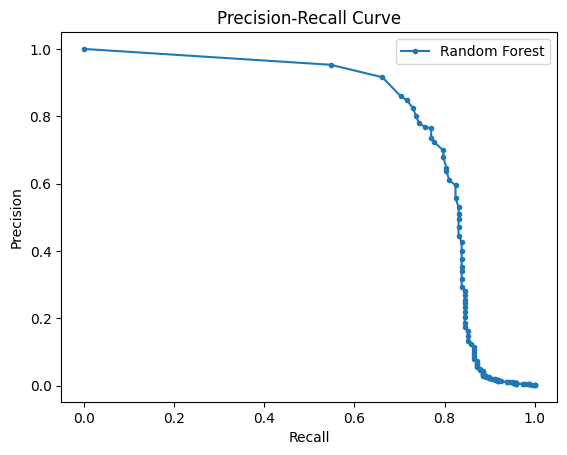

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the Precision-Recall curve
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [15]:
# Set minimum acceptable precision (e.g., 30%)
target_precision = 0.76
best_idx = np.argmax(precision >= target_precision)
best_threshold = thresholds[best_idx]

print(f"Threshold for {precision[best_idx]:.2f} precision: {best_threshold:.3f}")


Threshold for 0.77 precision: 0.920


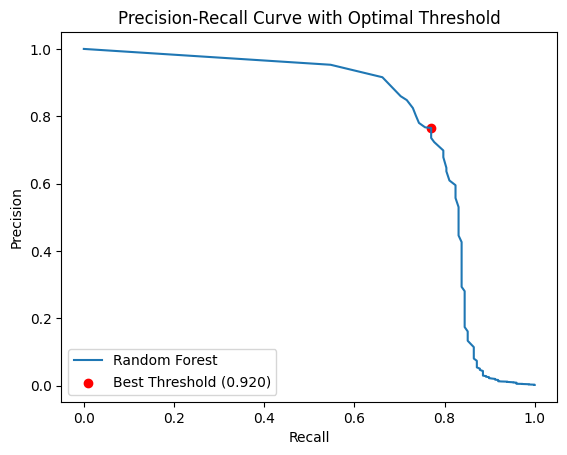

In [16]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, label='Random Forest')
plt.scatter(recall[best_idx], precision[best_idx], c='red', marker='o', label=f'Best Threshold ({best_threshold:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Optimal Threshold')
plt.legend()
plt.show()


In [17]:
# Convert probabilities to class labels using the optimal threshold
y_pred_custom = (y_proba >= best_threshold).astype(int)

# Generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.77      0.77       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443



This balanced performance means that 77% of all actual frauds are correctly detected, and 77% of transactions flagged as fraud are truly fraudulent, which represents a strong trade-off for this highly imbalanced dataset.


Logistic Regression Application

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc

In [20]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Calculate class weights inversely proportional to class frequencies
# For extreme imbalance (0.17% fraud)
n_samples = len(y_train)
n_fraud = (y_train==1).sum()
n_normal = (y_train==0).sum()
weight_fraud = n_normal / n_fraud  # Around 576:1

# Option 1: Automatically balanced weights
model = LogisticRegression(class_weight='balanced', 
                          max_iter=1000,  # Increase max iterations
                          solver='liblinear',  # Better for imbalanced data
                          random_state=42)

# Option 2: Manual weights (alternative approach)
# class_weights = {0: 1, 1: weight_fraud}
# model = LogisticRegression(class_weight=class_weights, max_iter=1000, random_state=42)



In [23]:
# Train the model
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (fraud)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Standard default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)

# Examine feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients.sort_values('Coefficient', ascending=False).head(10))


   Feature  Coefficient
4       V4     1.174391
22     V22     0.861149
1       V1     0.833239
5       V5     0.587614
11     V11     0.458349
21     V21     0.413106
19     V19     0.346814
28     V28     0.186441
3       V3     0.110464
23     V23     0.072921


V4 contributes most strongly to increasing the probability that a transaction is classified as fraudulent.

In [26]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# Calculate key metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_default, average='binary')
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {auc_score:.4f}")


Precision: 0.0669
Recall: 0.8784
F1-Score: 0.1243
ROC AUC: 0.9679


In [27]:
# Find optimal threshold using precision-recall tradeoff
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F2-score (beta=2 emphasizes recall)
f2_scores = (1 + 2**2) * (precisions * recalls) / (2**2 * precisions + recalls)
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]

# Apply optimized threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)


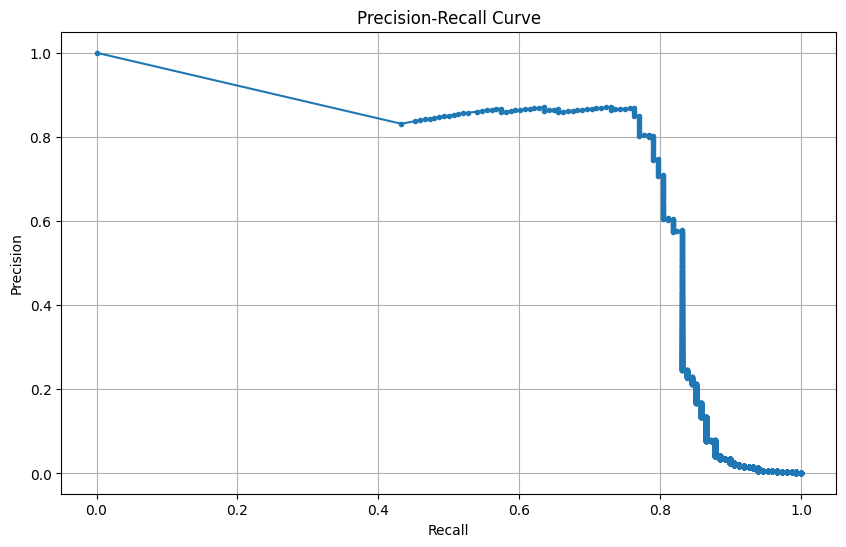

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3474561001.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')


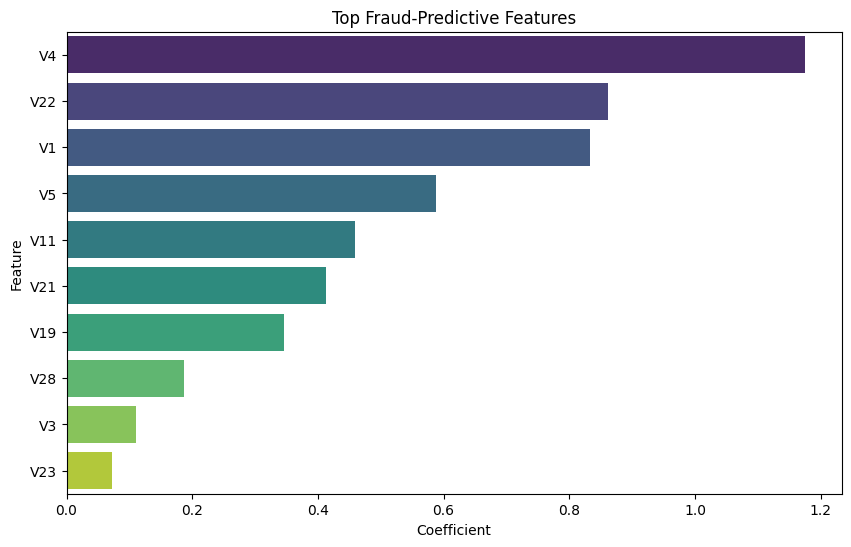

In [29]:
import seaborn as sns
# Precision-Recall Curve
plt.figure(figsize=(10,6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Feature Importance Visualization
top_features = coefficients.sort_values('Coefficient', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title('Top Fraud-Predictive Features')
plt.show()


In [30]:
# Find optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F2-score (emphasizes recall)
f2_scores = (5 * precisions * recalls) / (4 * precisions + recalls + 1e-7)
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]

# Apply optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimal))



Optimized Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.79      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



This suggests that:

The threshold optimization technique using F2-score was particularly effective for this problem

The features in this dataset might have linear relationships with the target variable

The logistic regression model's simplicity may have prevented overfitting

For production deployment, the logistic regression model appears to be the better choice based on these results, offering:

Better fraud detection rates

Fewer false positives

Potentially faster inference times

Greater interpretability of feature importance